In [8]:
import re
import string
from collections import defaultdict, Counter

import nltk as nltk
import numpy as np
import pandas as pd
from nltk import pos_tag, WordNetLemmatizer, SnowballStemmer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20184025\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20184025\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20184025\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\20184025\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\20184025\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
df_scientist_us_jobs = pd.read_csv('../data/data_scientist_united_states_job_postings_jobspikr.csv')
df_scientist_us_jobs.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [6]:
df_scientist_us_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crawl_timestamp       10000 non-null  object 
 1   url                   10000 non-null  object 
 2   job_title             10000 non-null  object 
 3   category              9118 non-null   object 
 4   company_name          9999 non-null   object 
 5   city                  9751 non-null   object 
 6   state                 9584 non-null   object 
 7   country               10000 non-null  object 
 8   inferred_city         8980 non-null   object 
 9   inferred_state        9484 non-null   object 
 10  inferred_country      9505 non-null   object 
 11  post_date             10000 non-null  object 
 12  job_description       10000 non-null  object 
 13  job_type              10000 non-null  object 
 14  salary_offered        597 non-null    object 
 15  job_board           

In [7]:
df_datascientist = pd.read_csv('../data/../data/DataScientist.csv', index_col=0)
df_datascientist.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [11]:
df_datascientist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3909 non-null   int64  
 1   Job Title          3909 non-null   object 
 2   Salary Estimate    3909 non-null   object 
 3   Job Description    3909 non-null   object 
 4   Rating             3909 non-null   float64
 5   Company Name       3909 non-null   object 
 6   Location           3909 non-null   object 
 7   Headquarters       3909 non-null   object 
 8   Size               3909 non-null   object 
 9   Founded            3909 non-null   int64  
 10  Type of ownership  3909 non-null   object 
 11  Industry           3909 non-null   object 
 12  Sector             3909 non-null   object 
 13  Revenue            3909 non-null   object 
 14  Competitors        3909 non-null   object 
 15  Easy Apply         3909 non-null   object 
dtypes: float64(1), int64(2),

In [6]:
df_datascientist['Job Description'][2]

"Decode_M\n\nhttps://www.decode-m.com/\n\nData Science Manager : Job Description\n\nWe’re hiring a Data Science Manager in our New York office to lead Decode_M’s Data Science team in developing new solutions for our clients and advancing the science of momentum through our proprietary product.\n\nThis position, based in New York City, requires an interest in managing Decode_M’s data science team, workflow and offerings. It demands excellent organizational skills, a natural curiosity, an eagerness to dive into the deep end, and a hunger to learn and grow while having a blast. Expect to learn a lot about cool companies, new products, and the latest in analytics, research and strategy.\n\nAbout You\nYou have an advanced degree in data science, mathematics, or another highly quantitative field, and are comfortable understanding and utilizing recent academic research in your work.\nYou have 3+ years of relevant work experience using applied statistics and/or machine learning. Bonus points i

In [7]:
def remove_urls(text):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    return re.sub(regex, '', text)

In [8]:
# remove urls
column_to_clean = 'Job Description'
df_datascientist[column_to_clean] = df_datascientist[column_to_clean].apply(remove_urls)
df_datascientist[column_to_clean]

0       ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...
1       At Noom, we use scientifically proven methods ...
2       Decode_M\n\n\n\nData Science Manager : Job Des...
3       Sapphire Digital seeks a dynamic and driven mi...
4       Director, Data Science - (200537)\nDescription...
                              ...                        
3904    About Us\n\nTachyon Technologies is a Digital ...
3905    Job description\nInterpret data, analyze resul...
3906    Job DescriptionThe Security Analytics Data Eng...
3907    The Security Analytics Data Engineer will inte...
3908    Help us transform patients' lives.\nAt UCB, we...
Name: Job Description, Length: 3909, dtype: object

In [9]:
df_datascientist[column_to_clean] = df_datascientist[column_to_clean].apply(lambda x: x.lower().strip())
df_datascientist[column_to_clean].head()

0    about hopper\n\nat hopper, we’re on a mission ...
1    at noom, we use scientifically proven methods ...
2    decode_m\n\n\n\ndata science manager : job des...
3    sapphire digital seeks a dynamic and driven mi...
4    director, data science - (200537)\ndescription...
Name: Job Description, dtype: object

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
st = SnowballStemmer('english')
word_Lemmatized = WordNetLemmatizer()
tag_map = defaultdict(lambda: wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV


def lemmatize(words):
    tag_map = defaultdict(lambda: wordnet.NOUN)
    tag_map['J'] = wordnet.ADJ
    tag_map['V'] = wordnet.VERB
    tag_map['R'] = wordnet.ADV

    words = [word_Lemmatized.lemmatize(word, tag_map[tag[0]]) for word, tag in pos_tag(words)]

    return words


def tokenize_and_remove(text):
    tokens = nltk.tokenize.word_tokenize(text)
    # remove punctuation and stopwords
    tokens = list(
        filter(lambda token: token not in string.punctuation and token not in stopwords and token.isalpha(),
               tokens))
    # stemming
    # tokens = [st.stem(token) for token in tokens]

    # lemmatize the words
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    tokens = lemmatize(tokens)

    return tokens


tokenize_and_remove(df_datascientist['Job Description'][2])

['data',
 'science',
 'manager',
 'job',
 'description',
 'hire',
 'data',
 'science',
 'manager',
 'new',
 'york',
 'office',
 'lead',
 'data',
 'science',
 'team',
 'develop',
 'new',
 'solution',
 'client',
 'advance',
 'science',
 'momentum',
 'proprietary',
 'product',
 'position',
 'base',
 'new',
 'york',
 'city',
 'require',
 'interest',
 'manage',
 'data',
 'science',
 'team',
 'workflow',
 'offering',
 'demand',
 'excellent',
 'organizational',
 'skill',
 'natural',
 'curiosity',
 'eagerness',
 'dive',
 'deep',
 'end',
 'hunger',
 'learn',
 'grow',
 'blast',
 'expect',
 'learn',
 'lot',
 'cool',
 'company',
 'new',
 'product',
 'late',
 'analytics',
 'research',
 'strategy',
 'advance',
 'degree',
 'data',
 'science',
 'mathematics',
 'another',
 'highly',
 'quantitative',
 'field',
 'comfortable',
 'understanding',
 'utilizing',
 'recent',
 'academic',
 'research',
 'work',
 'year',
 'relevant',
 'work',
 'experience',
 'use',
 'applied',
 'statistic',
 'machine',
 'learn',


In [11]:
df_datascientist['new tokens'] = df_datascientist[column_to_clean].apply(tokenize_and_remove)
df_datascientist.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,new tokens
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper\n\nat hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,"[hopper, hopper, mission, make, book, travel, ..."
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"at noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"[noom, use, scientifically, proven, method, he..."
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),decode_m\n\n\n\ndata science manager : job des...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"[data, science, manager, job, description, hir..."
3,3,Data Analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,"[sapphire, digital, seek, dynamic, drive, data..."
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"director, data science - (200537)\ndescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,"[director, data, science, description, edelman..."


In [12]:
all_tokens = []
for _, value in df_datascientist['new tokens'].iteritems():
    all_tokens.extend(value)

word_count_job1: Counter = Counter(all_tokens)

In [13]:
word_count_job1.most_common(100)

[('data', 35645),
 ('experience', 21462),
 ('work', 14942),
 ('team', 10144),
 ('business', 10101),
 ('skill', 7072),
 ('year', 7013),
 ('use', 6676),
 ('include', 6473),
 ('science', 6182),
 ('development', 6003),
 ('model', 5851),
 ('analysis', 5785),
 ('develop', 5763),
 ('ability', 5628),
 ('require', 5231),
 ('technology', 5161),
 ('solution', 4973),
 ('product', 4971),
 ('design', 4965),
 ('support', 4956),
 ('system', 4860),
 ('project', 4840),
 ('knowledge', 4795),
 ('provide', 4711),
 ('process', 4670),
 ('job', 4666),
 ('analytics', 4646),
 ('learn', 4638),
 ('research', 4525),
 ('opportunity', 4322),
 ('service', 4263),
 ('strong', 4253),
 ('information', 4235),
 ('company', 4234),
 ('new', 4197),
 ('technical', 4040),
 ('management', 4030),
 ('requirement', 3997),
 ('scientist', 3835),
 ('build', 3825),
 ('tool', 3800),
 ('report', 3673),
 ('need', 3633),
 ('environment', 3560),
 ('application', 3463),
 ('engineering', 3431),
 ('customer', 3417),
 ('position', 3393),
 ('mac

In [14]:
word_count_job1['rational']

7

In [15]:
word_count_job1['modeling']

578

In [16]:
word_count_job1['python']

2636

In [16]:
import article_terms

# word count from lemmatized list
personality_traits_lemma = lemmatize(article_terms.all_personality_traits)
p_trait_lemma_count = {}
for p_trait in personality_traits_lemma:
    p_trait_lemma_count[p_trait] = word_count_job1[p_trait]

p_trait_lemma_count

# Direct text search of listed traits or skills

In [2]:


path_output = lambda file_name: os.path.join('..', 'output', file_name)

In [18]:
# combine all job descriptions into 1 string
all_job_descriptions_1 = ""
for idx, value in df_datascientist['Job Description'].iteritems():
    all_job_descriptions_1 += value

all_job_descriptions_1 = all_job_descriptions_1.lower()
len(all_job_descriptions_1), all_job_descriptions_1[:100]

(13939723,
 'about hopper\n\nat hopper, we’re on a mission to make booking travel faster, easier, and more transpar')

In [19]:
all_job_descriptions_2 = ""
for idx, value in df_scientist_us_jobs['job_description'].iteritems():
    all_job_descriptions_2 += value

all_job_descriptions_2 = all_job_descriptions_2.lower()
len(all_job_descriptions_2), all_job_descriptions_2[:100]

(41434191,
 'read what people are saying about working here. \n\nwe are farmers!\n\njoin a team of diverse profession')

In [59]:
def clean_string_from_characters(text):
    return re.sub('(?![ -~]).', '', text)


all_job_descriptions_1 = clean_string_from_characters(all_job_descriptions_1)
all_job_descriptions_2 = clean_string_from_characters(all_job_descriptions_2)

In [60]:
# write to disk

def write_to_txt(text: str, file_name: str):
    with open(path_output(file_name), 'w') as fp:
        fp.write(text)


write_to_txt(all_job_descriptions_1, 'jop_descriptions_ds1.txt')
write_to_txt(all_job_descriptions_2, 'jop_descriptions_ds2_us.txt')

### Run analysis code from here

In [1]:
import os

path_output = lambda file_name: os.path.join('..', 'output', file_name)


def read_txt(file_name: str) -> str:
    with open(path_output(file_name), 'r') as fp:
        text = fp.read()
    return text


all_job_descriptions_1 = read_txt('jop_descriptions_ds1.txt')
all_job_descriptions_2 = read_txt('jop_descriptions_ds2_us.txt')

In [19]:
from typing import Optional
import article_terms
import pandas as pd

total_nr_job_description = 13909


def count_traits_in_text(list_of_traits, output_csv: Optional[str] = None):
    traits_count = {}

    for trait in list_of_traits:
        traits_count[trait] = {'job1': all_job_descriptions_1.count(trait)}
        traits_count[trait]['job2'] = all_job_descriptions_2.count(trait)
        traits_count[trait]['total'] = traits_count[trait]['job1'] +\
                                       traits_count[trait]['job2']
        traits_count[trait]['relative_occurrence_job'] = traits_count[trait]['total'] / total_nr_job_description

    df_traits_count = pd.DataFrame(traits_count)
    df_traits_count = df_traits_count.T
    df_traits_count = df_traits_count.sort_values('total', ascending=False)

    if output_csv:
        df_traits_count.to_csv(path_output(output_csv))

    return df_traits_count

In [20]:
df_personality_traits_count = count_traits_in_text(article_terms.all_personality_traits, 'personality_traits.csv')
df_personality_traits_count

,job1,job2,total,relative_occurrence_job
technical,4519.0,12492.0,17011.0,1.223021
analytical,2539.0,9067.0,11606.0,0.834424
rational,787.0,2708.0,3495.0,0.251276
mathematical,383.0,2474.0,2857.0,0.205407
creative,615.0,2146.0,2761.0,0.198505
agile,661.0,1651.0,2312.0,0.166223
logical,795.0,955.0,1750.0,0.125818
curiosity,191.0,837.0,1028.0,0.073909
creativity,246.0,768.0,1014.0,0.072902
strong communication,188.0,623.0,811.0,0.058308


In [21]:
df_seeked_traits = count_traits_in_text(article_terms.all_seeked_traits, 'seeked_traits.csv')
df_seeked_traits

,job1,job2,total,relative_occurrence_job
management,4143.0,10062.0,14205.0,1.021281
communication,2443.0,6616.0,9059.0,0.651305
presentation skills,185.0,670.0,855.0,0.061471
mentoring,195.0,587.0,782.0,0.056223
team player,237.0,471.0,708.0,0.050902
risk management,149.0,530.0,679.0,0.048817
critical thinking,158.0,509.0,667.0,0.047955
time management,157.0,231.0,388.0,0.027896
cooperation,27.0,56.0,83.0,0.005967
software skills,26.0,17.0,43.0,0.003092


In [22]:
df_soft_skills = count_traits_in_text(article_terms.all_soft_skills, 'soft_skills.csv')
df_soft_skills

,job1,job2,total,relative_occurrence_job
communication,2443.0,6616.0,9059.0,0.651305
communication skills,1309.0,3501.0,4810.0,0.345819
collaboration,655.0,1692.0,2347.0,0.168740
problem-solving,446.0,1005.0,1451.0,0.104321
curiosity,191.0,837.0,1028.0,0.073909
team player,237.0,471.0,708.0,0.050902
critical thinking,158.0,509.0,667.0,0.047955
verbal and written communication skills,199.0,432.0,631.0,0.045366
business acumen,142.0,407.0,549.0,0.039471
storytelling,54.0,168.0,222.0,0.015961


In [23]:
df_hard_skills = count_traits_in_text(article_terms.list_hard_skills_1, 'hard_skills.csv')
df_hard_skills

,job1,job2,total,relative_occurrence_job
machine learning,3195.0,20158.0,23353.0,1.678985
statistics,1988.0,10707.0,12695.0,0.912718
programming,1577.0,6683.0,8260.0,0.593860
data visualization,713.0,3268.0,3981.0,0.286218
deep learning,436.0,3414.0,3850.0,0.276799
predictive modeling,268.0,2301.0,2569.0,0.184701
coding,451.0,1413.0,1864.0,0.134014
data wrangling,70.0,333.0,403.0,0.028974
calculus,28.0,231.0,259.0,0.018621
linear algebra,66.0,191.0,257.0,0.018477


In [24]:
df_all_traits_skills = count_traits_in_text(article_terms.all_traits_skills, 'all_traits_skills.csv')
df_all_traits_skills

,job1,job2,total,relative_occurrence_job
machine learning,3195.0,20158.0,23353.0,1.678985
technical,4519.0,12492.0,17011.0,1.223021
management,4143.0,10062.0,14205.0,1.021281
statistics,1988.0,10707.0,12695.0,0.912718
analytical,2539.0,9067.0,11606.0,0.834424
communication,2443.0,6616.0,9059.0,0.651305
programming,1577.0,6683.0,8260.0,0.593860
communication skills,1309.0,3501.0,4810.0,0.345819
data visualization,713.0,3268.0,3981.0,0.286218
deep learning,436.0,3414.0,3850.0,0.276799


## Word co occurence and graph

In [9]:
from typing import List
import article_terms

def count_occurrences_words(text: str, list_words: List[str]):
    word_count = [text.count(word) for word in list_words]

    word_occurrence = np.zeros((len(list_words), len(list_words)))
    for i, count in enumerate(word_count):
        for j, count2 in enumerate(word_count):
            if count > 0 and count2 > 0:
                word_occurrence[i, j] += 1
                word_occurrence[j, i] += 1
    return word_occurrence


In [2]:
def word_cooccurence(df, list_words, col_to_search):
    df['word_occur'] = df[col_to_search].apply(lambda x: count_occurrences_words(x, list_words))
    total_word_cooccurrence = np.zeros((len(list_words), len(list_words)))
    for i, value in df['word_occur'].iteritems():
        total_word_cooccurrence += value

    return total_word_cooccurrence

In [10]:
word_cooccurence_job1 = word_cooccurence(df_datascientist, article_terms.all_traits_skills, 'Job Description')

In [11]:
word_cooccurence_job2 = word_cooccurence(df_scientist_us_jobs, article_terms.all_traits_skills, 'job_description')

In [12]:
total_word_cooccurrence = word_cooccurence_job1 + word_cooccurence_job2
total_word_cooccurrence

array([[2.0000e+00, 0.0000e+00, 2.0000e+00, ..., 2.0000e+00, 2.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.2660e+03, 7.0000e+01, ..., 2.9400e+02, 7.9200e+02,
        1.3600e+02],
       [2.0000e+00, 7.0000e+01, 1.5260e+03, ..., 3.9000e+02, 9.5200e+02,
        2.4200e+02],
       ...,
       [2.0000e+00, 2.9400e+02, 3.9000e+02, ..., 3.5340e+03, 1.9680e+03,
        3.2400e+02],
       [2.0000e+00, 7.9200e+02, 9.5200e+02, ..., 1.9680e+03, 1.3186e+04,
        1.2820e+03],
       [0.0000e+00, 1.3600e+02, 2.4200e+02, ..., 3.2400e+02, 1.2820e+03,
        1.9940e+03]])

In [17]:
np.save('../output/word_occurence_matrix', total_word_cooccurrence)

In [5]:
import numpy as np
total_word_cooccurrence = np.load('../output/word_occurence_matrix.npy')
total_word_cooccurrence

array([[2.0000e+00, 0.0000e+00, 2.0000e+00, ..., 2.0000e+00, 2.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.2660e+03, 7.0000e+01, ..., 2.9400e+02, 7.9200e+02,
        1.3600e+02],
       [2.0000e+00, 7.0000e+01, 1.5260e+03, ..., 3.9000e+02, 9.5200e+02,
        2.4200e+02],
       ...,
       [2.0000e+00, 2.9400e+02, 3.9000e+02, ..., 3.5340e+03, 1.9680e+03,
        3.2400e+02],
       [2.0000e+00, 7.9200e+02, 9.5200e+02, ..., 1.9680e+03, 1.3186e+04,
        1.2820e+03],
       [0.0000e+00, 1.3600e+02, 2.4200e+02, ..., 3.2400e+02, 1.2820e+03,
        1.9940e+03]])

In [15]:
import networkx as nx
import article_terms
import matplotlib.pyplot as plt

def show_graph_with_labels(adjacency_matrix, labels, min_nr_links=100):
    node_size = np.sqrt(np.diag(adjacency_matrix)) * 10
    adjacency_matrix = adjacency_matrix.copy()
    np.fill_diagonal(adjacency_matrix, 0) # remove self links
    # get nodes which have at least x links
    rows, cols = np.where(adjacency_matrix > min_nr_links)

    # show only nodes that have a connection
    idxs_nodes = np.unique(rows)
    labels = {i:a for i, a in enumerate(labels)}
    node_size = node_size[idxs_nodes]
    print(f'Nodes remaining, with {min_nr_links} links:',len(idxs_nodes))

    # create graph
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(edges)

    plt.figure(figsize=(16,16))
    pos = nx.spring_layout(gr, k=0.55, iterations=40)
    nx.draw(gr, nodelist=idxs_nodes, pos=pos, labels=labels, with_labels=True, node_size=node_size, font_color='orange', font_size=15)
    plt.show()
    return gr

Nodes remaining, with 100 links: 42


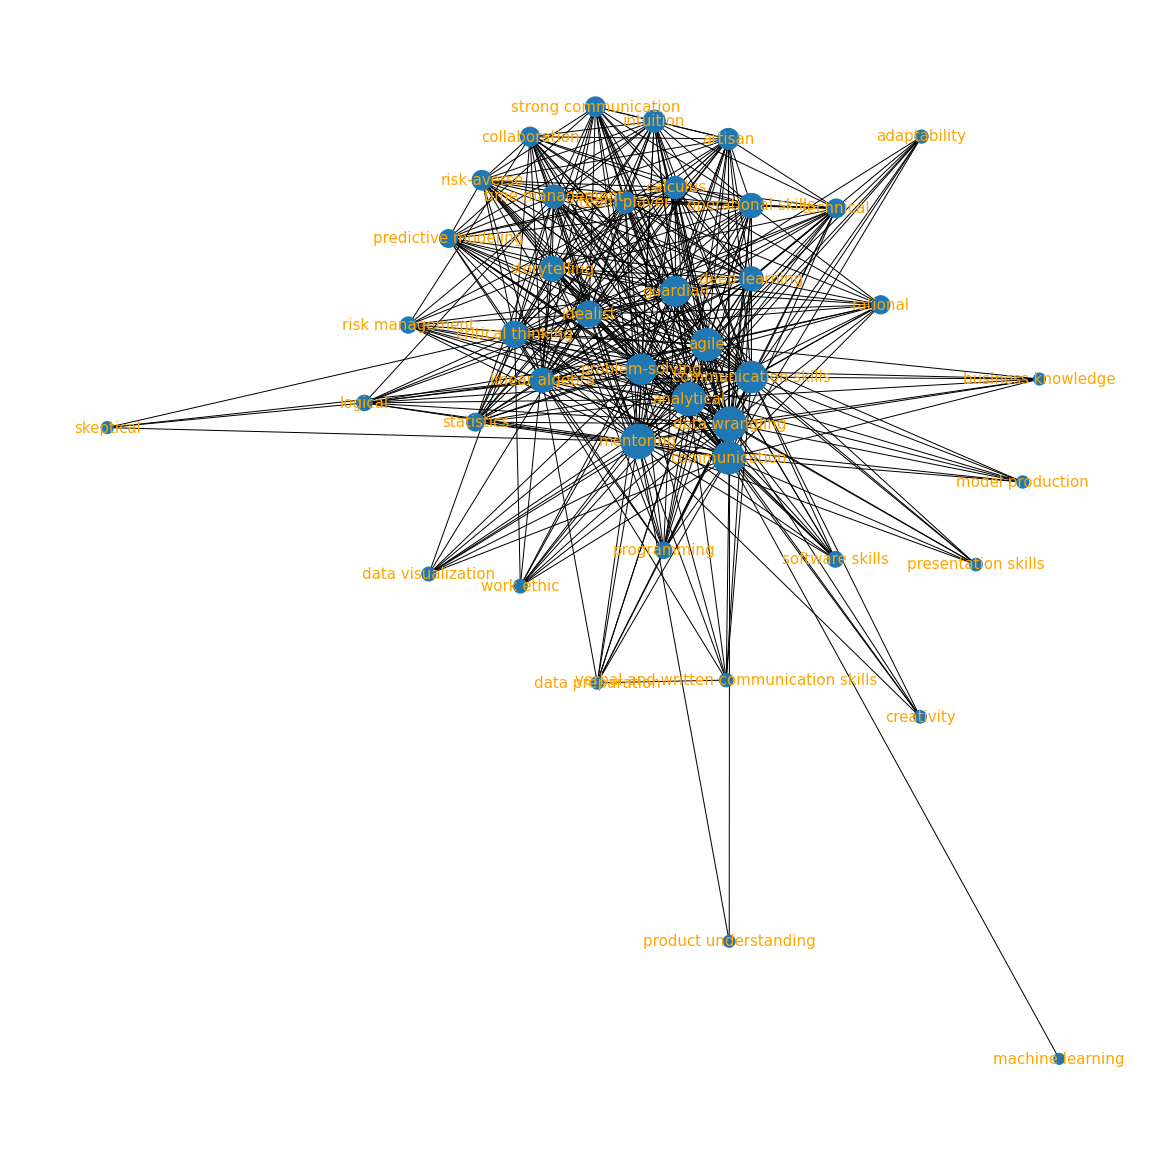

In [19]:
G = show_graph_with_labels(total_word_cooccurrence, article_terms.all_traits_skills, min_nr_links=100)

In [120]:
rows, cols = np.where(total_word_cooccurrence > 20)
# show only nodes that have a connection
idxs_nodes = np.unique(rows)
print(idxs_nodes)
total_word_cooccurrence[idxs_nodes][:, idxs_nodes]


[ 1  3  4  5  7  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 38 39 41 42 43 44 45 46 47 48 50 51]


array([[  0.,   6., 160., ..., 870.,  36.,  42.],
       [  6.,   0.,   0., ...,  34.,   2.,   2.],
       [160.,   0.,   0., ..., 646.,  24.,  98.],
       ...,
       [870.,  34., 646., ...,   0., 124., 364.],
       [ 36.,   2.,  24., ..., 124.,   0.,  12.],
       [ 42.,   2.,  98., ..., 364.,  12.,   0.]])

In [76]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go

def networkGraph(adjacency_matrix, labels, min_nr_links=100):
    node_size = np.sqrt(np.diag(adjacency_matrix)) * 10
    adjacency_matrix = adjacency_matrix.copy()
    np.fill_diagonal(adjacency_matrix, 0) # remove self links
    # get nodes which have at least x links
    rows, cols = np.where(adjacency_matrix > min_nr_links)

    # show only nodes that have a connection
    idxs_nodes = np.unique(rows)
    node_size = node_size[idxs_nodes]
    print(f'Nodes remaining, with {min_nr_links} links:',len(idxs_nodes))

    # create graph
    edges = zip(rows.tolist(), cols.tolist())
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, k=0.55, iterations=40)

    # edges trace
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(color='black', width=1),
        hoverinfo='none',
        showlegend=False,
        mode='lines')

    # nodes trace
    node_x = []
    node_y = []
    text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        text.append(labels[node])

    node_trace = go.Scatter(
        x=node_x, y=node_y, text=text,
        mode='markers+text',
        showlegend=False,
        hoverinfo='none',
        textfont=dict(color='black', size=15),
        marker=dict(
            color='lightblue',
            size=40,
            line=dict(color='black', width=1)))

    # layout
    layout = dict(plot_bgcolor='white',
                  paper_bgcolor='white',
                  margin=dict(t=10, b=10, l=10, r=10, pad=0),
                  xaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True),
                  yaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True))

    # figure
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    # fig.update_traces(textfont_color='black', text_bold=True)

    return fig

In [77]:
fig = networkGraph(total_word_cooccurrence, article_terms.all_traits_skills, min_nr_links=500)
fig.show()

Nodes remaining, with 500 links: 29
